## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.

1. What is the difference between regression and classification?

Regression is when you are predicting a continuous value or real number, such as price or temperature. Classification is when you are predicting a discrete value, such as spam or not spam to put it into a category.

2. What is a confusion table/matrix? What does it help us understand about a model's performance? 

A confusion table/matrix is a table that summarizes the performance of a classification model. It is a table that shows the number of true positives, true negatives, false positives, and false negatives. It helps us understand how well the model is performing by showing us how many of the predictions are correct and how many are incorrect.

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

Accuracy is the number of correct predictions divided by the total number of predictions. It is a measure of how well the model is performing. However, it might not be entirely sufficient to evaluate a classifer's predictive performance because it does not take into account the cost of false positives and false negatives. For example, if a model is used to detect a disease, a false negative could be very costly. In this case, accuracy might not be the best metric to use.

4. What does the root mean squared error quantify about a particular model?

It quantifies the average distance between your model’s predicted values and the actual values in your dataset

5. What are overfitting and underfitting? 

Overfitting is when a model is too complex and fits the data too well, capturing noise and outliers. Underfitting is when a model is too simple and does not fit the data well.

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

It prevents overfitting and helps find the sweet spot for $k$.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Reporting a class label as a prediction is a simple approach that is easy to interpret. However, it does not provide any information about the uncertainty of the prediction. Reporting a probability distribution over class labels provides more information about the uncertainty of the prediction, but it is more complex to interpret.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).



mine_type
1    0.210059
2    0.207101
3    0.195266
4    0.195266
5    0.192308
Name: proportion, dtype: float64


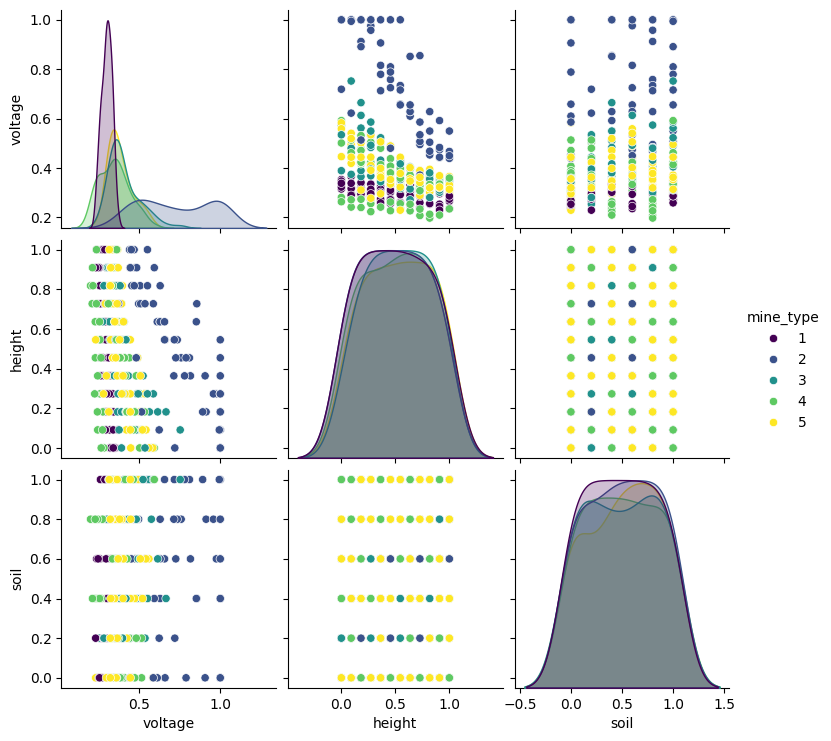

          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('land_mines.csv')

# Summarizing the target label
print(df['mine_type'].value_counts(normalize=True))

# Relationship between features
sns.pairplot(df, hue='mine_type', palette='viridis')
plt.show()

# Descriptive statistics
print(df.describe())



2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('mine_type', axis=1)
y = df['mine_type']

# stratify=y ensures the 50/50 split maintains the balance of mine types
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)


3. Build a $k$-NN classifier. Explain how you select $k$.


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Identify the best k
best_k = scores.index(max(scores)) + 1
print(f"Optimal k: {best_k}")

Optimal k: 2



4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?


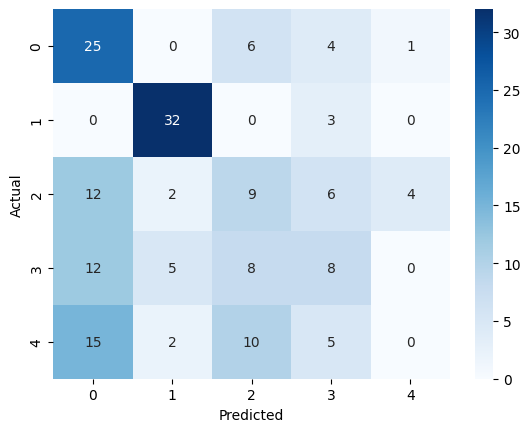

              precision    recall  f1-score   support

           1       0.39      0.69      0.50        36
           2       0.78      0.91      0.84        35
           3       0.27      0.27      0.27        33
           4       0.31      0.24      0.27        33
           5       0.00      0.00      0.00        32

    accuracy                           0.44       169
   macro avg       0.35      0.42      0.38       169
weighted avg       0.36      0.44      0.39       169



In [4]:
from sklearn.metrics import confusion_matrix, classification_report

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))


5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

If I were advising a field team using this model, I would emphasize that the model is a decision-support tool, not a replacement for safety protocols

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.


In [7]:
import pandas as pd
import numpy as np

# Load the data
cars_df = pd.read_csv('./data/USA_cars_datasets.csv')

# Keep only relevant variables
cars_df = cars_df[['price', 'year', 'mileage']]

# Check head, dimensions, and NAs
print(f"Dimensions: {cars_df.shape}")
print(f"Missing values:\n{cars_df.isna().sum()}")
print(cars_df.head())

Dimensions: (2499, 3)
Missing values:
price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654



2. Maxmin normalize `year` and `mileage`.


In [8]:
# Normalizing features
for col in ['year', 'mileage']:
    cars_df[col] = (cars_df[col] - cars_df[col].min()) / (cars_df[col].max() - cars_df[col].min())

print("Normalized data head:")
print(cars_df.head())

Normalized data head:
   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537



3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.


In [9]:
from sklearn.model_selection import train_test_split

X = cars_df[['year', 'mileage']]
y = cars_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?


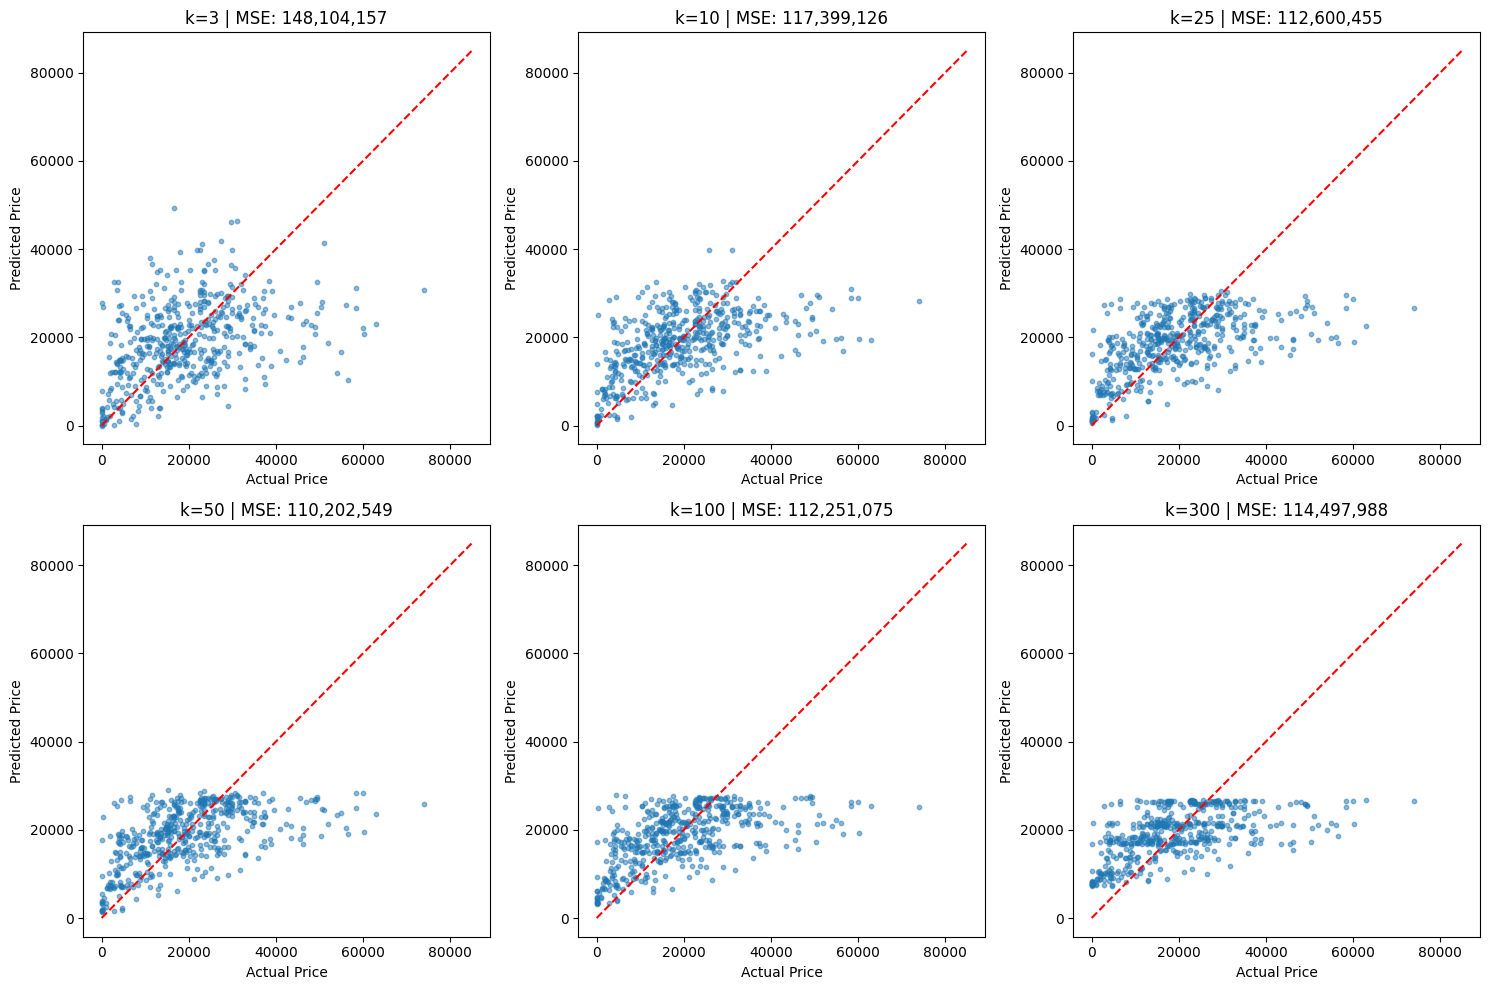

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_list = [3, 10, 25, 50, 100, 300]
mse_results = {}

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_list):
    # Fit model
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    
    # Predict
    y_pred = knn_reg.predict(X_test)
    
    # Compute MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse
    
    # Plotting
    plt.subplot(2, 3, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5, s=10)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # 45-degree line
    plt.title(f'k={k} | MSE: {mse:,.0f}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()


5. Determine the optimal $k$ for these data.


In [11]:
best_k = min(mse_results, key=mse_results.get)
print(f"The optimal k value is {best_k} with an MSE of {mse_results[best_k]:,.2f}")

The optimal k value is 50 with an MSE of 110,202,549.30



6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

The model is overfitting when k is small, as it is too closely following the training data. The model is underfitting when k is large, as it is too far from the training data.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?



2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('./data/airbnb_hw.csv')

# Remove commas from the Price column and convert to float
df['Price'] = df['Price'].replace(',', '', regex=True).astype(float)

# Now proceed with your missing value logic...
missing_df = df.loc[df['Review Scores Rating'].isnull()]
df_complete = df.dropna(axis=0, how='any')

# 1. Column filter using .loc
df = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]
print(f"Initial shape: {df.shape}")

Initial shape: (30478, 3)



2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.


In [19]:
# 2. Select rows with missing ratings
missing_df = df.loc[df['Review Scores Rating'].isnull()]

# 3. Create the complete cases dataframe
df_complete = df.dropna(axis=0, how='any')

print(f"Complete cases: {df_complete.shape[0]}")
print(f"Missing cases: {missing_df.shape[0]}")

Complete cases: 22111
Missing cases: 8323



4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)


In [20]:
# Prepare features and target
X = df_complete[['Price', 'Beds']]
y = df_complete['Review Scores Rating']

# 80/20 split for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [1, 5, 10, 20, 50, 100]
sse_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    
    # Calculate SSE
    sse = np.sum((y_test - preds)**2)
    sse_list.append(sse)

# Find optimal k
best_k = k_values[sse_list.index(min(sse_list))]
print(f"Optimal k for imputation: {best_k}")

Optimal k for imputation: 100



5. Predict the missing ratings. 


In [23]:
# 5. Predict the missing ratings

# Prepare the features for the rows that are missing a review score
X_missing = missing_df[['Price', 'Beds']].copy()

# --- FIX: Option A ---
# We fill missing 'Beds' values with the median so the model doesn't crash on NaNs
X_missing['Beds'] = X_missing['Beds'].fillna(df_complete['Beds'].median())

# Now, use your final_model (trained in Part 4) to predict the scores
imputed_ratings = final_model.predict(X_missing)

# Use .loc to explicitly set the values in the existing dataframe
missing_df.loc[:, 'Review Scores Rating'] = imputed_ratings


6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.


/var/folders/89/vy1sctd5199dh7fb1_5765v00000gn/T/ipykernel_1033/3648385942.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_complete['Review Scores Rating'], label='Original Ratings', shade=True)
/var/folders/89/vy1sctd5199dh7fb1_5765v00000gn/T/ipykernel_1033/3648385942.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(missing_df['Review Scores Rating'], label='Imputed Ratings', shade=True)


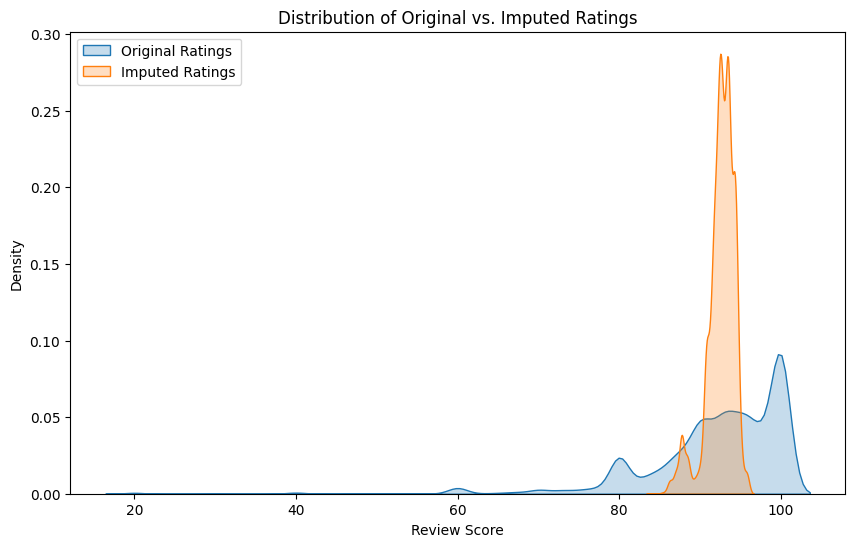

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_complete['Review Scores Rating'], label='Original Ratings', shade=True)
sns.kdeplot(missing_df['Review Scores Rating'], label='Imputed Ratings', shade=True)
plt.title('Distribution of Original vs. Imputed Ratings')
plt.xlabel('Review Score')
plt.legend()
plt.show()

No they don't look similar at all. The original ratings are much more spread out, while the imputed ratings are all clustered around the mean and its much taller and skinnier.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)